#IMPORT DATA

In [ ]:
import pandas as pd

file_path = '/content/data.csv'
df = pd.read_csv(file_path)
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


#UNDERSTANDING THE DATA

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#DATA PREPROCESSING

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df.drop(columns=["id"],inplace = True)

##Handling Missing Values

In [ ]:
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


##Outliers

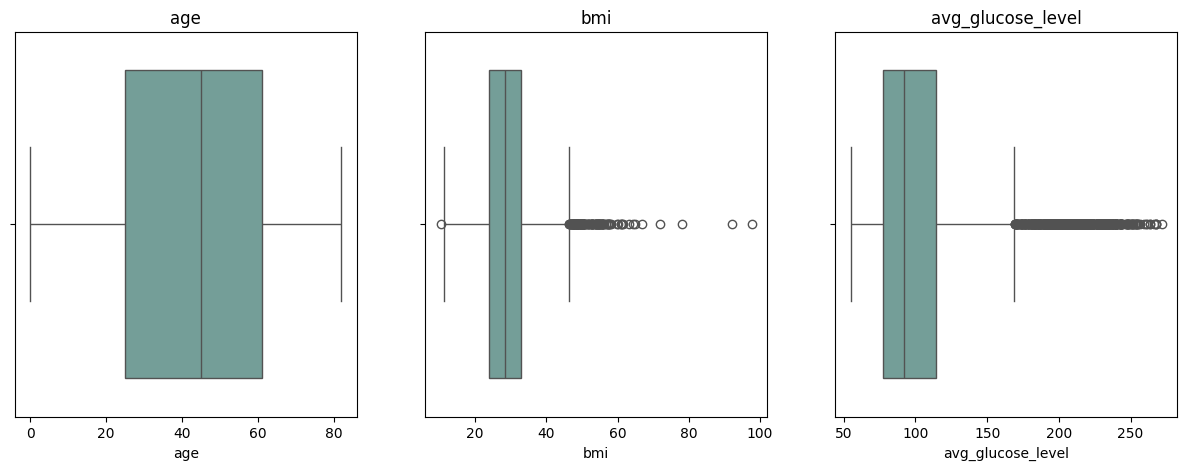

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [ ]:
df = df[df['bmi'] > 12]
df = df[df['bmi'] < 100]


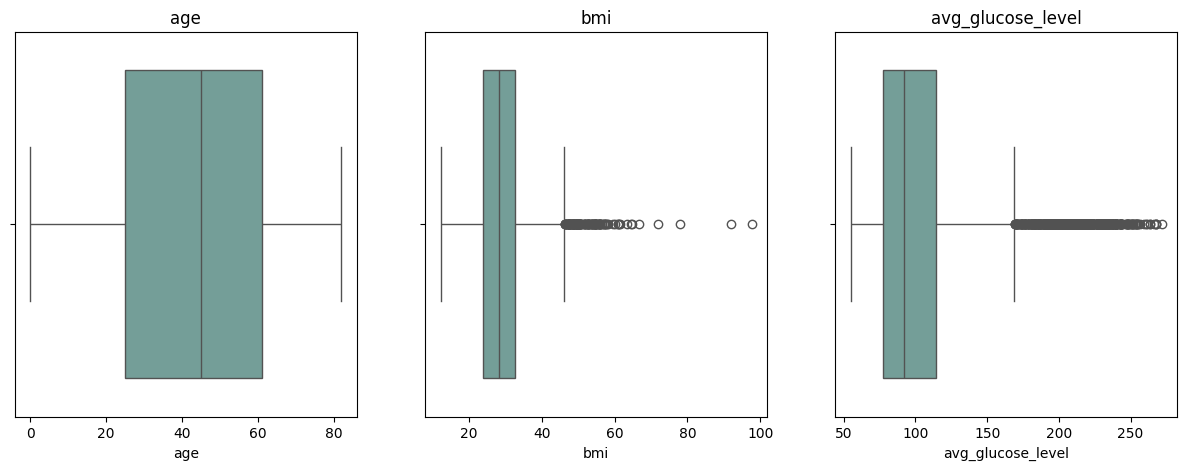

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

##Data Encoding

In [ ]:
cat_col = [colm for colm in df.columns if df[colm].dtype == "O"]
cat_col

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
df[cat_col].head()
df[cat_col].isnull()
Categorical=df[cat_col]

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(df, columns):
    encoders = {}
    label_mappings = {}

    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
        label_mappings[col] = {index: label for index, label in enumerate(le.classes_)}

    return df, label_mappings


In [ ]:
def label_mapping(mapping_dict):
    for col, mapping in mapping_dict.items():
        print(f"{col}:")
        for key, value in mapping.items():
            print(f"{key} -> {value}")
        print("-" * 20)


In [ ]:
Categorical, mappings = encode_labels(Categorical, cat_col)

# Display the mappings
label_mapping(mappings)

gender:
0 -> Female
1 -> Male
2 -> Other
--------------------
ever_married:
0 -> No
1 -> Yes
--------------------
work_type:
0 -> Govt_job
1 -> Never_worked
2 -> Private
3 -> Self-employed
4 -> children
--------------------
Residence_type:
0 -> Rural
1 -> Urban
--------------------
smoking_status:
0 -> Unknown
1 -> formerly smoked
2 -> never smoked
3 -> smokes
--------------------


<ipython-input-12-f0ef6abb1491>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-12-f0ef6abb1491>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-12-f0ef6abb1491>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
Num_col = [colm for colm in df.columns if df[colm].dtype != "O" ]
Num_col

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [ ]:
Numerical=df[Num_col]

In [ ]:
data = pd.concat([Categorical,Numerical],axis=1)
data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,67.0,0,1,228.69,36.600000,1
1,0,1,3,0,2,61.0,0,0,202.21,28.893237,1
2,1,1,2,0,2,80.0,0,1,105.92,32.500000,1
3,0,1,2,1,3,49.0,0,0,171.23,34.400000,1
4,0,1,3,0,2,79.0,1,0,174.12,24.000000,1


In [ ]:
data.shape

(5106, 11)

#VIZUALIZATIONS

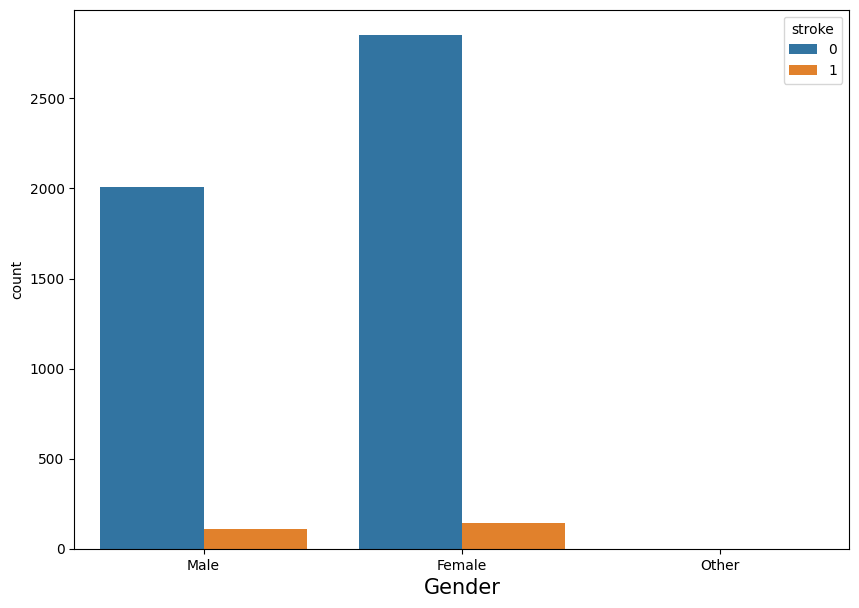

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(data=df,x='gender',hue='stroke')
plt.xlabel("Gender",fontsize = 15)
plt.show()

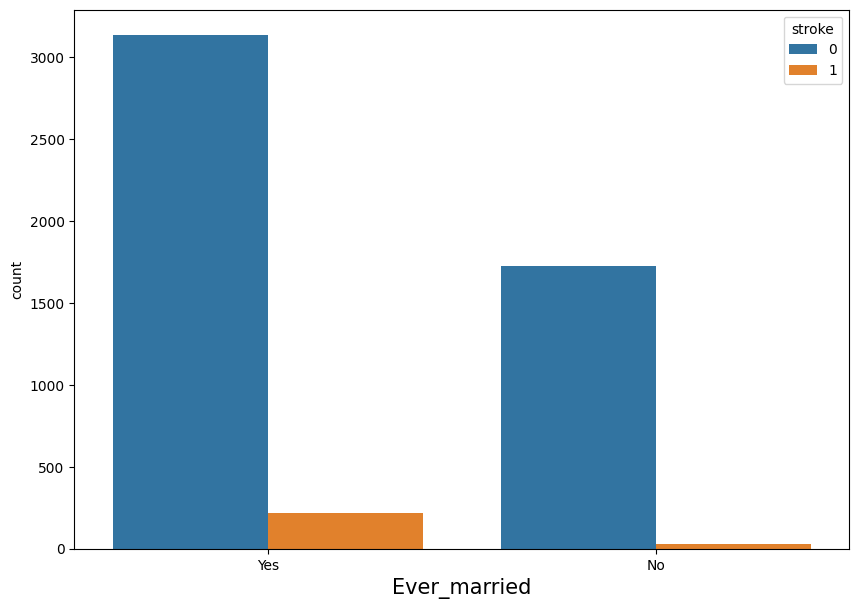

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.xlabel("Ever_married",fontsize = 15)
plt.show()

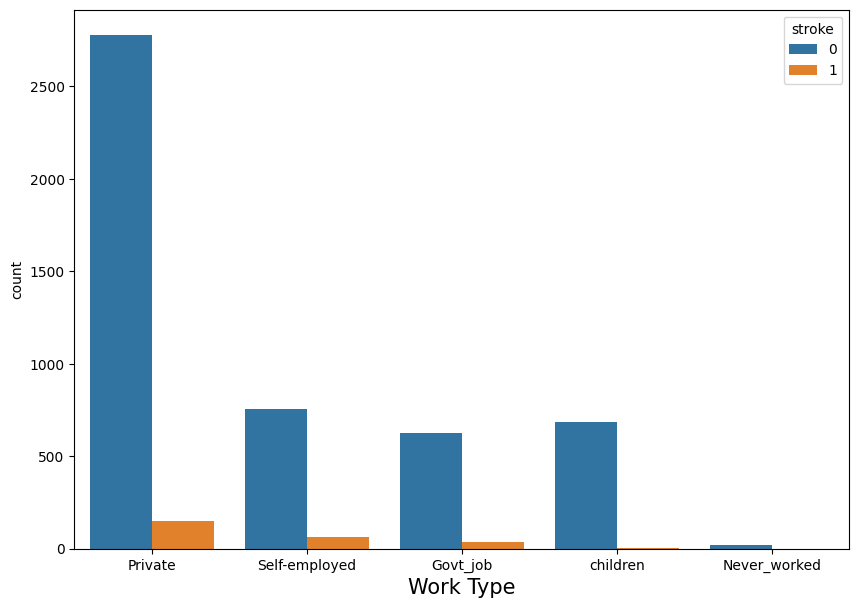

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(data=df,x='work_type',hue='stroke')
plt.xlabel("Work Type",fontsize = 15)
plt.show()

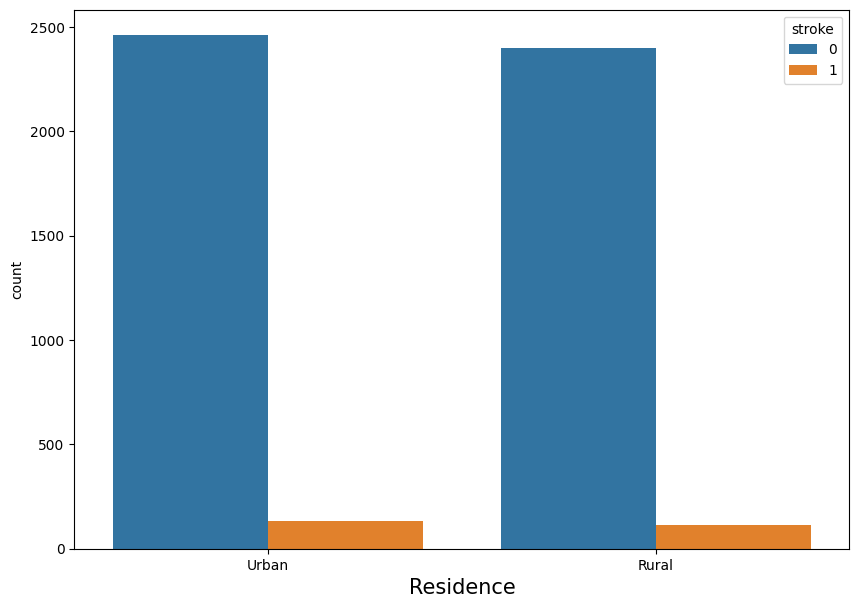

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(data=df,x='Residence_type',hue='stroke')
plt.xlabel("Residence",fontsize = 15)
plt.show()

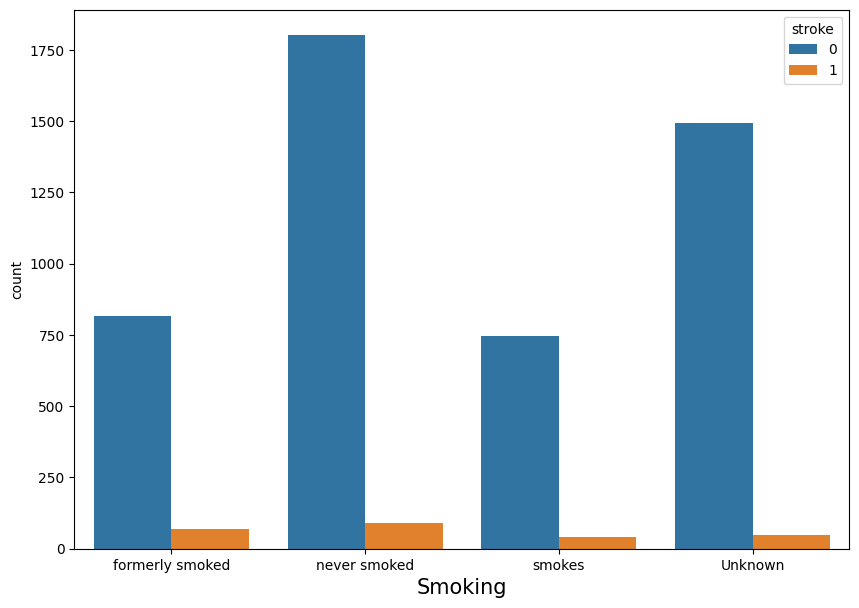

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.xlabel("Smoking",fontsize = 15)
plt.show()

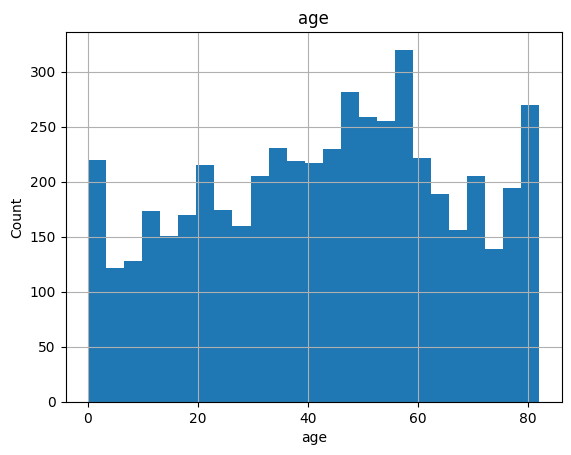

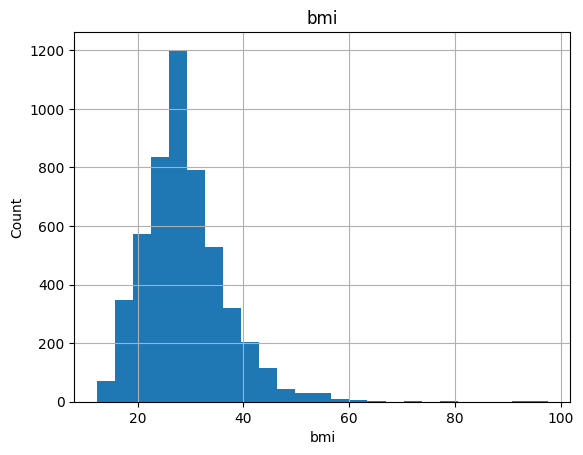

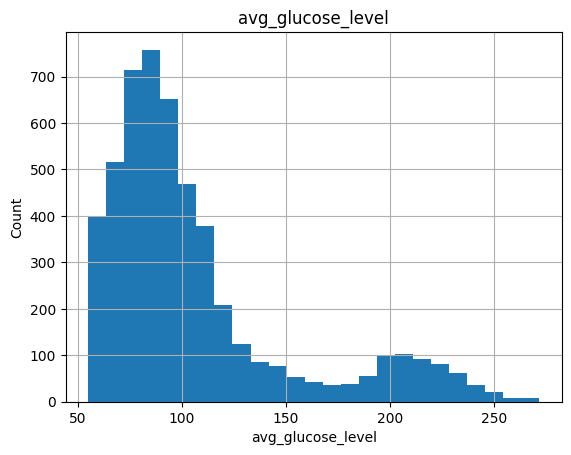

In [ ]:
import matplotlib.pyplot as plt

for feature in num_cols:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

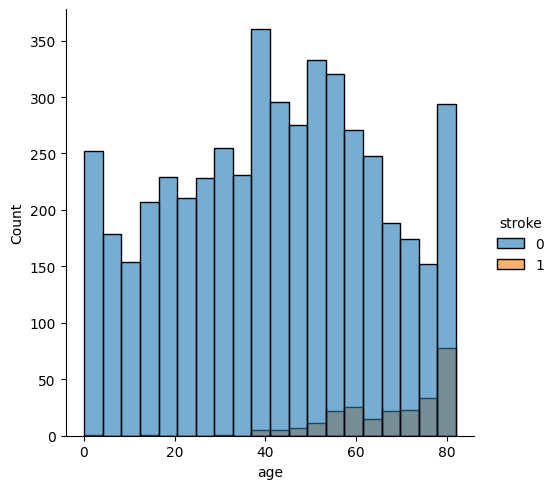

In [ ]:
sns.displot(x='age', hue='stroke', data=df, alpha=0.6)
plt.show()

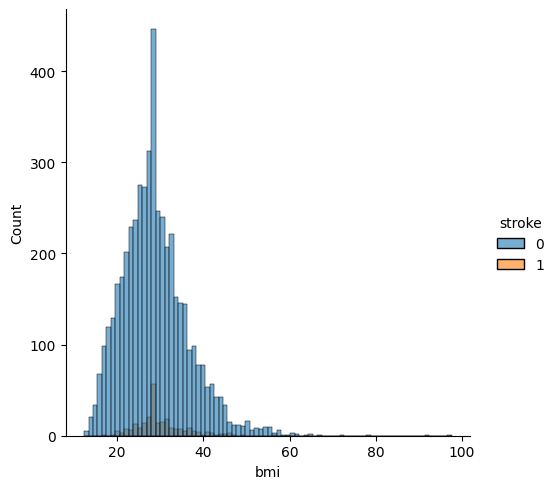

In [ ]:
sns.displot(x='bmi', hue='stroke', data=df, alpha=0.6)
plt.show()

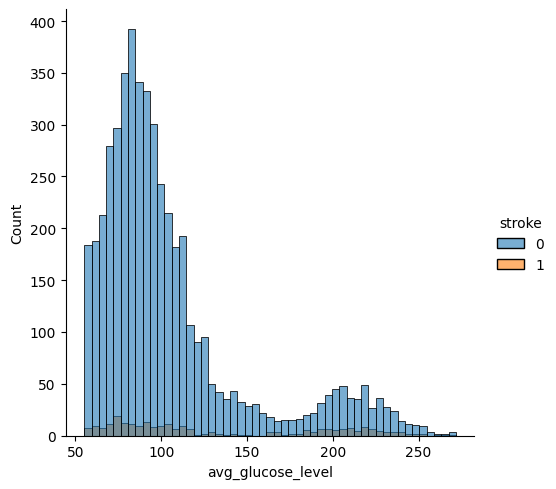

In [ ]:
sns.displot(x='avg_glucose_level', hue='stroke', data=df, alpha=0.6)
plt.show()

<ipython-input-30-38efddc11d06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Numerical[column])
<ipython-input-30-38efddc11d06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Numerical[column])
<ipython-input-30-38efddc11d06>:7: UserWarning: 

`distplot` is a deprecated function and will b

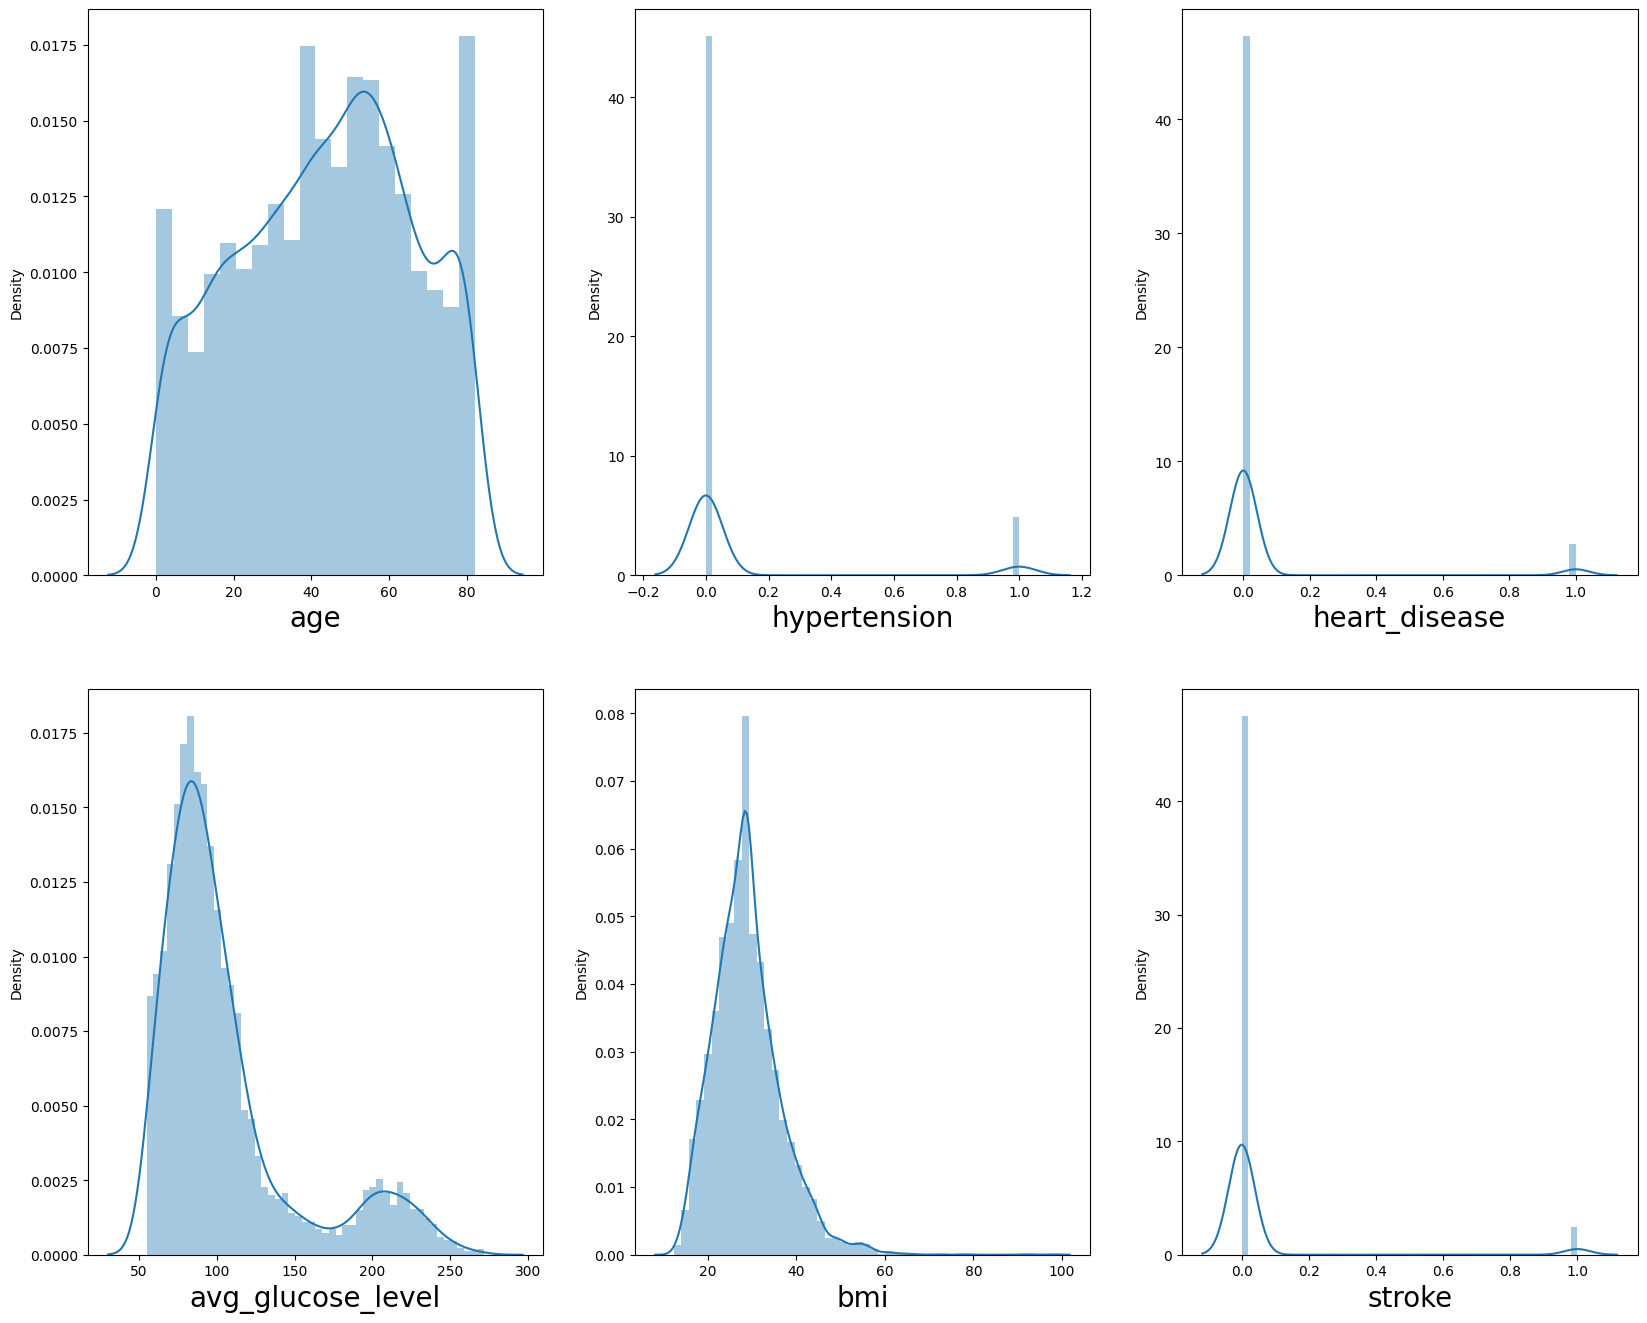

In [ ]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()


<Axes: >

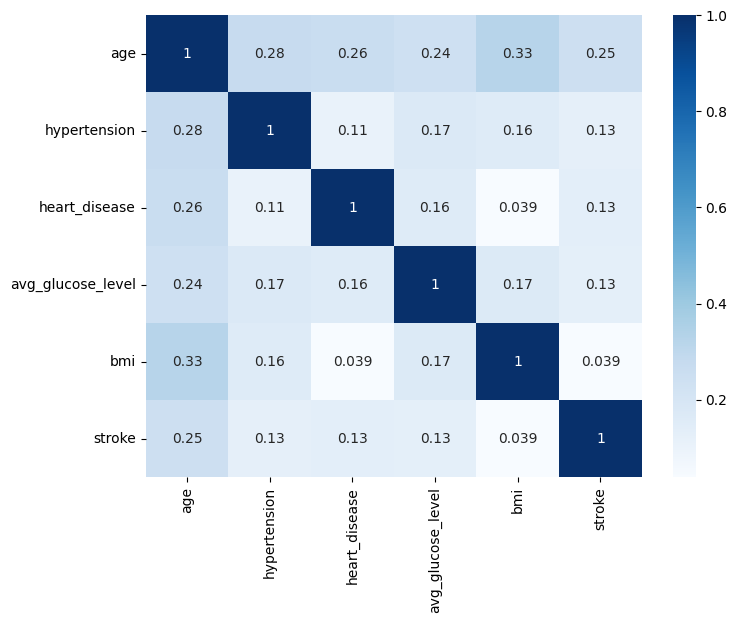

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

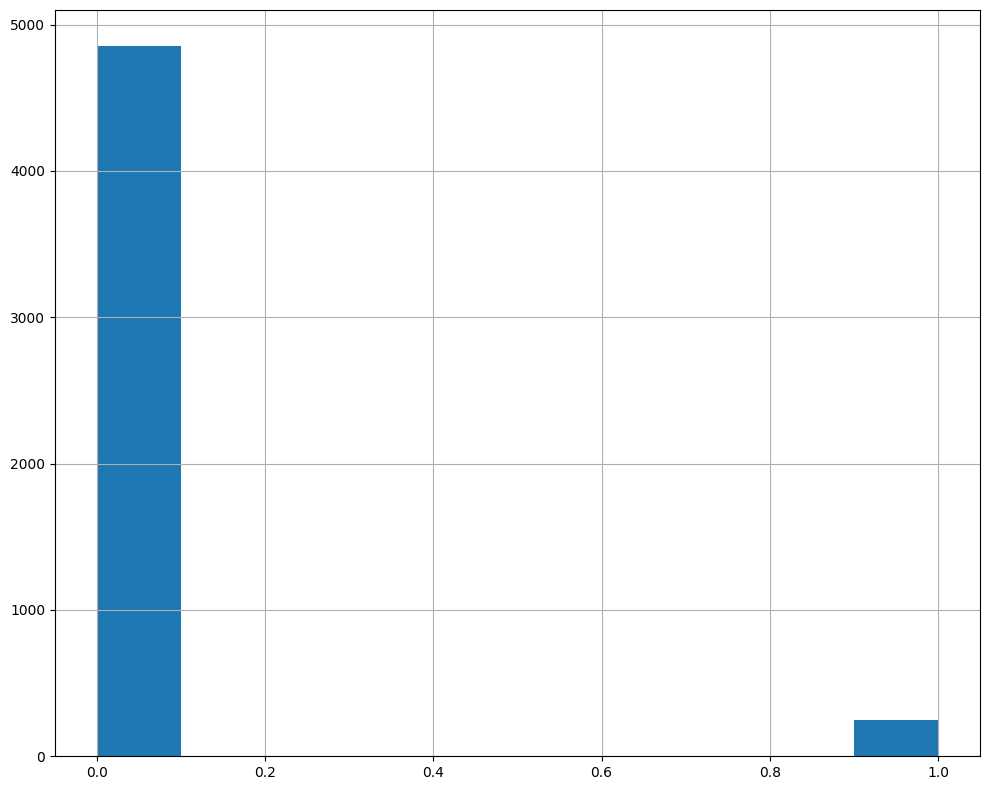

In [ ]:
fig = data['stroke'].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

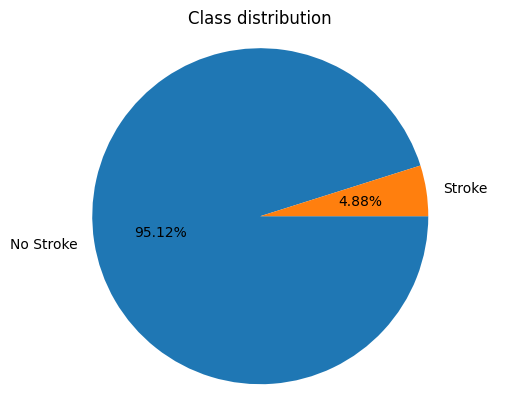

# samples associated with no stroke: 4857
# samples associated with stroke: 249


In [ ]:
class_occur = data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%', startangle=0, counterclock=False)
ax.axis('equal')
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [ ]:
from imblearn.over_sampling import SMOTE

X = data.loc[:, data.columns != 'stroke']
y = data['stroke']

X_resampled, y_resampled = smote.fit_resample(X, y)

print("Shape of X after SMOTE: {}".format(X_resampled.shape))
print("Shape of y after SMOTE: {}".format(y_resampled.shape))


Shape of X after SMOTE: (9714, 10)
Shape of y after SMOTE: (9714,)


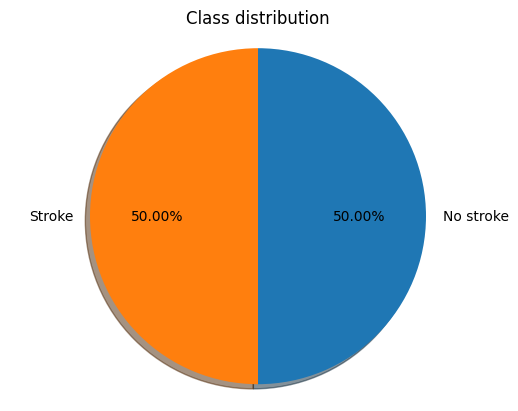

# samples associated with no stroke: 4857
# samples associated with stroke: 4857


In [ ]:
import numpy as np
_, class_counts = np.unique(y_resampled, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


#SPLITING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_resampled,test_size=0.2,random_state = 10)

In [ ]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (7771, 10)
Shape of X Test:  (1943, 10)
Shape of y Train:  (7771,)
Shape of y Test:  (1943,)


#MODEL CREATION


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score,
    precision_score, recall_score, roc_auc_score,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

def ML_model(model):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix Visualization
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Model Evaluation
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nAccuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    #return model

##Decision Tree

In [ ]:
dtmodel = DecisionTreeClassifier(random_state=42)

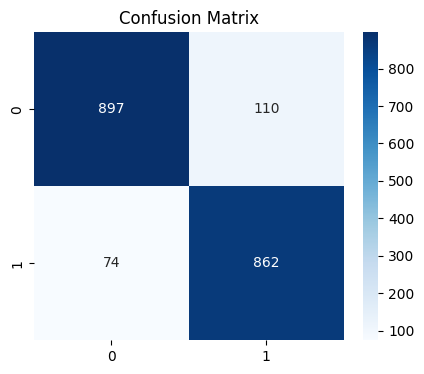

Confusion Matrix:
 [[897 110]
 [ 74 862]]

Accuracy Score: 90.53%
F1 Score: 0.9035639412997903
Precision Score: 0.8868312757201646
Recall Score: 0.9209401709401709
AUC Score: 0.9058524092039483

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      1007
           1       0.89      0.92      0.90       936

    accuracy                           0.91      1943
   macro avg       0.91      0.91      0.91      1943
weighted avg       0.91      0.91      0.91      1943



In [ ]:
ML_model(dtmodel)

##Random Forest

In [ ]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)

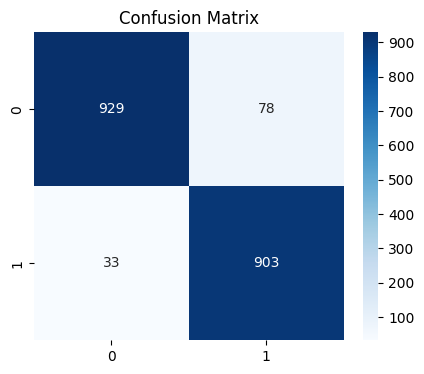

Confusion Matrix:
 [[929  78]
 [ 33 903]]

Accuracy Score: 94.29%
F1 Score: 0.9420970266040689
Precision Score: 0.9204892966360856
Recall Score: 0.9647435897435898
AUC Score: 0.9436428971558068

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1007
           1       0.92      0.96      0.94       936

    accuracy                           0.94      1943
   macro avg       0.94      0.94      0.94      1943
weighted avg       0.94      0.94      0.94      1943



In [ ]:
ML_model(rfmodel)

#ANN

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,Activation
from tensorflow import keras
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1024, input_dim=10, activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation= "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,889 (2.31 MB)

 Trainable params: 605,889 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss= "binary_crossentropy" , optimizer="adam", metrics=["accuracy"])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_resampled,test_size=0.2,random_state = 10)
perf = model.fit(X_train, y_train, validation_split =0.1,epochs=10)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4879 - loss: 8.2545 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.4925 - loss: 8.1792 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.4966 - loss: 8.1138 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4939 - loss: 8.1152 - val_accuracy: 0.5206 - val_loss: 7.6433
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5115 - loss: 7.7884 - val_accuracy: 0.5206 - val_loss: 7.6433
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4947 - loss: 8.0555 - val_accuracy: 0.5206 - val_loss: 7.6433
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5453 - loss: 7.2320 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5068 - loss: 7.9491 - val_accu

In [ ]:
perf=model.fit(X_train, y_train, validation_split =0.1,epochs=50,initial_epoch=10)

Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4979 - loss: 8.0932 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4923 - loss: 8.1824 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 13/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5052 - loss: 7.9750 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 14/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5107 - loss: 7.8859 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 15/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.4992 - loss: 8.0725 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 16/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4945 - loss: 8.1470 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 17/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5064 - loss: 7.9552 - val_accuracy: 0.4794 - val_loss: 8.3720
Epoch 18/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6338 - loss: 5.8734 - 

In [ ]:
perf=model.fit(X_train, y_train, validation_split =0.1,epochs=100,initial_epoch=50)

Epoch 51/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7753 - loss: 3.5966 - val_accuracy: 0.7815 - val_loss: 3.4998
Epoch 52/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7874 - loss: 3.4040 - val_accuracy: 0.7776 - val_loss: 3.5412
Epoch 53/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7825 - loss: 3.4841 - val_accuracy: 0.7712 - val_loss: 3.6617
Epoch 54/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7848 - loss: 3.4221 - val_accuracy: 0.7635 - val_loss: 3.7770
Epoch 55/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7797 - loss: 3.5154 - val_accuracy: 0.7635 - val_loss: 3.7777
Epoch 56/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7787 - loss: 3.5362 - val_accuracy: 0.7635 - val_loss: 3.7777
Epoch 57/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7737 - loss: 3.6147 - val_accuracy: 0.7584 - val_loss: 3.8587
Epoch 58/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7751 - loss: 3

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


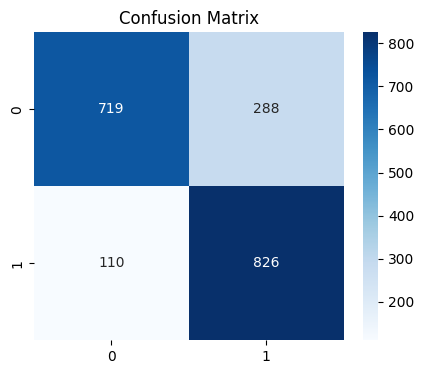

Confusion Matrix:
 [[719 288]
 [110 826]]

Accuracy Score: 79.52%
F1 Score: 0.8058536585365854
Precision Score: 0.7414721723518851
Recall Score: 0.8824786324786325
AUC Score: 0.7982403092879756

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78      1007
           1       0.74      0.88      0.81       936

    accuracy                           0.80      1943
   macro avg       0.80      0.80      0.79      1943
weighted avg       0.81      0.80      0.79      1943



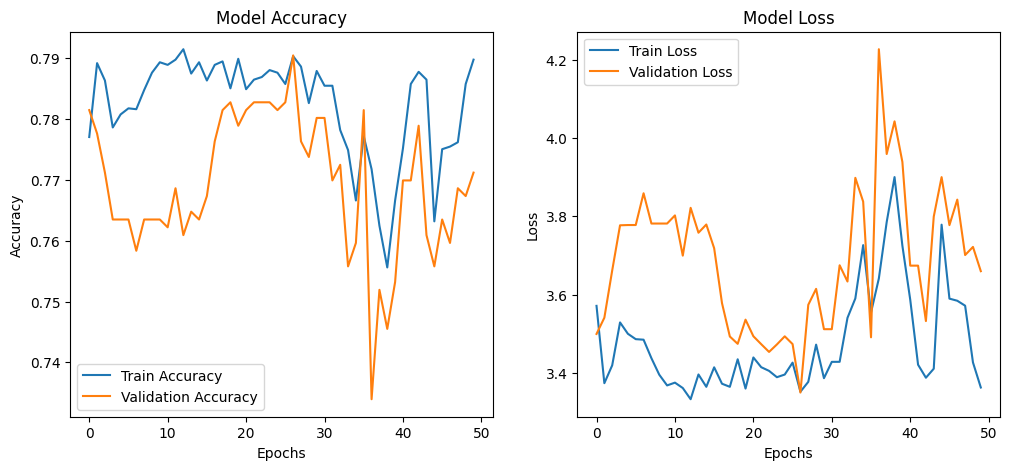

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(perf.history['accuracy'], label='Train Accuracy')
plt.plot(perf.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(perf.history['loss'], label='Train Loss')
plt.plot(perf.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

import pickle
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump('model', open(filename, 'wb'))

In [ ]:
rfmodel.predict_proba(X_test)[:, 1]  # Gives probability for class 1


array([0.99, 0.4 , 1.  , ..., 0.83, 0.99, 0.94])

In [ ]:
model.predict(X_test)  # Returns values between 0 and 1


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[-444.11627],
       [-224.0641 ],
       [-161.33784],
       ...,
       [-328.0486 ],
       [-586.6113 ],
       [-528.66516]], dtype=float32)

In [ ]:
rf_probs = rfmodel.predict_proba(X_test)[:, 1]  # shape: (n_samples,)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
ann_probs = model.predict(X_test).reshape(-1)  # shape: (n_samples,)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
import numpy as np

# Stack them as columns
hybrid_input = np.column_stack((rf_probs, ann_probs))  # shape: (n_samples, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression(class_weight='balanced')
meta_model.fit(hybrid_input, y_test)


# Make final predictions
final_preds = meta_model.predict(hybrid_input)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Basic Metrics
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

# Optional: Confusion Matrix and Full Report
conf_matrix = confusion_matrix(y_test, final_preds)
class_report = classification_report(y_test, final_preds)

# Print the results
print(f"🔍 Accuracy:  {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"📈 Recall:    {recall:.4f}")
print(f"🏁 F1 Score:  {f1:.4f}")
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📝 Classification Report:\n", class_report)


🔍 Accuracy:  0.7838
🎯 Precision: 0.1435
📈 Recall:    0.5161
🏁 F1 Score:  0.2246

📊 Confusion Matrix:
 [[769 191]
 [ 30  32]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87       960
           1       0.14      0.52      0.22        62

    accuracy                           0.78      1022
   macro avg       0.55      0.66      0.55      1022
weighted avg       0.91      0.78      0.83      1022



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
newmodel = Sequential([
    Dense(40, activation='relu', input_dim=10),  # Input layer with 10 features
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Display the model summary
newmodel.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 40)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,481 (5.79 KB)

 Trainable params: 1,481 (5.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_resampled,test_size=0.2,random_state = 10)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (assuming you have training data: X_train, y_train)
model.fit(X_train, y_train, epochs=10, batch_size=32,initial_epoch=0,validation_split=0.2)


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.0444 - loss: 15.2341 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0474 - loss: 15.1872 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0502 - loss: 15.1428 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0410 - loss: 15.2895 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0423 - loss: 15.2680 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0434 - loss: 15.2508 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0466 - loss: 15.1988 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0442 - loss: 15.

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32,initial_epoch=10,validation_split=0.2)

Epoch 11/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.0428 - loss: 15.2599 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 12/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.0508 - loss: 15.1320 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 13/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0475 - loss: 15.1849 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 14/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0531 - loss: 15.0957 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 15/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0445 - loss: 15.2331 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 16/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0471 - loss: 15.1918 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 17/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0451 - loss: 15.2227 - val_accuracy: 0.0453 - val_loss: 15.2204
Epoch 18/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0462 - l

In [ ]:
X_train.shape

(7771, 10)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:17:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:17:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1007
           1       0.89      0.98      0.93       936

    accuracy                           0.93      1943
   macro avg       0.94      0.93      0.93      1943
weighted avg       0.94      0.93      0.93      1943

[[892 115]
 [ 15 921]]


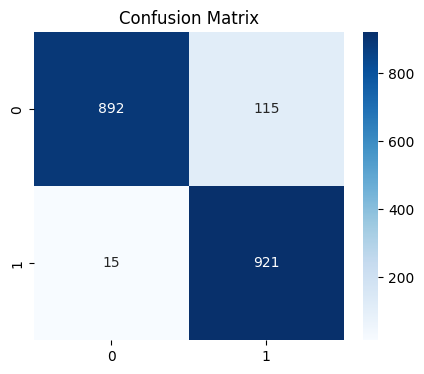

Confusion Matrix:
 [[892 115]
 [ 15 921]]

Accuracy Score: 93.31%
F1 Score: 0.934077079107505
Precision Score: 0.888996138996139
Recall Score: 0.9839743589743589
AUC Score: 0.9348868815725817

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      1007
           1       0.89      0.98      0.93       936

    accuracy                           0.93      1943
   macro avg       0.94      0.93      0.93      1943
weighted avg       0.94      0.93      0.93      1943



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

xgb = XGBClassifier(scale_pos_weight=5, eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
ML_model(xgb)

In [ ]:
rf_probs = rfmodel.predict_proba(X_test)[:, 1]

In [ ]:
ann_probs=xgb.predict_proba(X_test)[:, 1]

In [ ]:
import numpy as np

# Stack them as columns
hybrid_input = np.column_stack((rf_probs, ann_probs))

In [ ]:
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression(class_weight='balanced')
meta_model.fit(hybrid_input, y_test)


# Make final predictions
final_preds = meta_model.predict(hybrid_input)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Basic Metrics
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

# Optional: Confusion Matrix and Full Report
conf_matrix = confusion_matrix(y_test, final_preds)
class_report = classification_report(y_test, final_preds)

# Print the results
print(f"🔍 Accuracy:  {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"📈 Recall:    {recall:.4f}")
print(f"🏁 F1 Score:  {f1:.4f}")
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📝 Classification Report:\n", class_report)


🔍 Accuracy:  0.9542
🎯 Precision: 0.9398
📈 Recall:    0.9669
🏁 F1 Score:  0.9531

📊 Confusion Matrix:
 [[949  58]
 [ 31 905]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1007
           1       0.94      0.97      0.95       936

    accuracy                           0.95      1943
   macro avg       0.95      0.95      0.95      1943
weighted avg       0.95      0.95      0.95      1943



In [ ]:
X_new=X_train[14:11]
rf_prob = rfmodel.predict_proba(X_new)[:, 1].reshape(-1, 1)


In [ ]:
ann_prob=xgb.predict_proba(X_new)[:, 1].reshape(-1, 1)
rf_prob
ann_prob

array([[0.00035512]], dtype=float32)

In [ ]:
import numpy as np

hybrid_input = np.concatenate((rf_prob, ann_prob), axis=1)  # shape: (n_samples, 2)


In [ ]:
final_preds = meta_model.predict(hybrid_input)           # Binary predictions (0 or 1)
final_probs = meta_model.predict_proba(hybrid_input)[:, 1]  # Probability of stroke


In [ ]:
final_probs
y_train[14:15]

,stroke
7678,1
